In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
import plotly.graph_objects as go

In [40]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [237]:
import scipy.stats  as stats

In [243]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [58]:
df = pd.read_csv('SPbPU_19092019.tsv', sep='\t')

print("Column headings:")
print(df.columns)

Column headings:
Index(['Title', 'Authors', 'Number of Authors', 'Scopus Author Ids', 'Year',
       'Scopus Source title', 'Volume', 'Issue', 'Pages', 'ISSN', 'Source ID',
       'Source-type', 'SNIP 2018', 'CiteScore 2018', 'SJR 2018',
       'Field-Weighted View Impact', 'Views', 'Citations',
       'Field-Weighted Citation Impact',
       'Outputs in Top Citation Percentiles, per percentile',
       'Field-Weighted Outputs in Top Citation Percentiles, per percentile',
       'Reference', 'Abstract', 'DOI', 'Publication-type', 'EID', 'PubMed ID',
       'Institutions', 'Scopus affiliation IDs', 'Scopus affiliation names',
       'Country', 'All Science Journal Classification (ASJC) Code',
       'All Science Journal Classification (ASJC) Field Name',
       'Topic Cluster name', 'Topic Cluster number', 'Topic name',
       'Topic number', 'Тип кластера', 'Качество публикаций'],
      dtype='object')


In [3]:
df.head()

,Title,Authors,Number of Authors,Scopus Author Ids,Year,Scopus Source title,Volume,Issue,Pages,ISSN,...,Scopus affiliation names,Country,All Science Journal Classification (ASJC) Code,All Science Journal Classification (ASJC) Field Name,Topic Cluster name,Topic Cluster number,Topic name,Topic number,Тип кластера,Качество публикаций
0,Combined Measurement of the Higgs Boson Mass i...,"Aad, G., Abbott, B., Abdallah, J., Abdinov, O....",5154,"10039166400, 10039501900, 10039870000, 1004034...",2015,Physical Review Letters,114,19,-,319007,...,The Oskar Klein Centre; Wigner Research Centre...,"Argentina, Armenia, Australia, Austria, Azerba...",3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Standard model (particle physics),Mass,Gaugino...",452,K,U
1,The Casimir force between real materials: Expe...,"Klimchitskaya, G.L., Mohideen, U., Mostepanenk...",3,"57204251027, 7004591147, 7005933320",2009,Reviews of Modern Physics,81,4,1827-1885,346861,...,Noncommercial Partnership Scientific Instrumen...,"Germany, Russian Federation, United States",3100,General Physics and Astronomy,"Gravitation,Black Holes (Astronomy),Models",15,"Force,Interactions,Proximity force",1282,K,W
2,Measurements of the Higgs boson production and...,"The ATLAS collaboration, , Aad, G., Abbott, B....",5114,"10039166400, 10039501900, 10039870000, 1004034...",2016,Journal of High Energy Physics,2016,8,-,11266708,...,The Oskar Klein Centre; Albert Einstein Center...,"Argentina, Armenia, Australia, Austria, Azerba...",3106,Nuclear and High Energy Physics,"Decay,Quarks,Neutrinos",6,"Higgs bosons,Standard model (particle physics)...",10763,K,U
3,Enhanced production of direct photons in Au+Au...,"Adare, A., Afanasiev, S., Aidala, C., Ajitanan...",421,"10042257900, 10045788800, 11040108500, 1104143...",2010,Physical Review Letters,104,13,-,319007,...,University of Colorado at Boulder; Institut de...,"Brazil, China, Czech Republic, Germany, France...",3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Collisions,Ionic collisions,Flow harmonics",633,K,U
4,Performance of the ALICE experiment at the CER...,"Abelev, B., Abramyan, A., Adam, J., Adamová, D...",944,"10040141100, 10639169200, 11039847000, 1104010...",2014,International Journal of Modern Physics A,29,24,-,0217751X,...,National Centre for Nuclear Studies; Konkuk Un...,"Armenia, Brazil, Switzerland, China, Cuba, Cze...",3103; 3106; 3107,Astronomy and Astrophysics; Nuclear and High E...,"Decay,Quarks,Neutrinos",6,"Colliding beam accelerators,Heavy ions,Pp coll...",28474,K,U


In [4]:
df.shape

(11862, 39)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11862 entries, 0 to 11861
Data columns (total 39 columns):
Title                                                                 11862 non-null object
Authors                                                               11862 non-null object
Number of Authors                                                     11862 non-null int64
Scopus Author Ids                                                     11862 non-null object
Year                                                                  11862 non-null int64
Scopus Source title                                                   11862 non-null object
Volume                                                                11862 non-null object
Issue                                                                 11862 non-null object
Pages                                                                 11862 non-null object
ISSN                                                             

In [5]:
df.describe()

,Number of Authors,Year,Views,Citations,"Outputs in Top Citation Percentiles, per percentile","Field-Weighted Outputs in Top Citation Percentiles, per percentile"
count,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000
mean,207.568032,2015.562131,33.471590,6.668353,39.199376,38.954561
std,695.571022,2.597816,52.376198,18.009176,21.652932,22.781415
min,1.000000,2009.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,2014.000000,10.000000,0.000000,21.000000,21.000000
50%,4.000000,2016.000000,18.000000,2.000000,41.000000,43.000000
75%,6.000000,2018.000000,34.000000,6.000000,57.000000,62.000000
max,5215.000000,2020.000000,1718.000000,711.000000,75.000000,71.000000


In [59]:
#Удаляем ненужные колонки
df_useful = df.drop(['Authors','Source ID', 'Scopus Author Ids','Volume', 'Issue', 'Pages', 'ISSN','DOI','EID','PubMed ID','Scopus affiliation IDs','Reference', 'Abstract', 'Publication-type', 'Institutions',
       'Scopus affiliation names', 'Country',], axis=1)

In [7]:
df_useful.head()

,Title,Number of Authors,Year,Scopus Source title,Source-type,SNIP 2018,CiteScore 2018,SJR 2018,Field-Weighted View Impact,Views,...,"Outputs in Top Citation Percentiles, per percentile","Field-Weighted Outputs in Top Citation Percentiles, per percentile",All Science Journal Classification (ASJC) Code,All Science Journal Classification (ASJC) Field Name,Topic Cluster name,Topic Cluster number,Topic name,Topic number,Тип кластера,Качество публикаций
0,Combined Measurement of the Higgs Boson Mass i...,5154,2015,Physical Review Letters,Journal,"2,548","5,76","4,656","63,03",1277,...,1,1,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Standard model (particle physics),Mass,Gaugino...",452,K,U
1,The Casimir force between real materials: Expe...,3,2009,Reviews of Modern Physics,Journal,"18,82",-,"36,88","5,66",130,...,1,1,3100,General Physics and Astronomy,"Gravitation,Black Holes (Astronomy),Models",15,"Force,Interactions,Proximity force",1282,K,W
2,Measurements of the Higgs boson production and...,5114,2016,Journal of High Energy Physics,Journal,"1,334","3,97","1,163","142,87",1718,...,1,1,3106,Nuclear and High Energy Physics,"Decay,Quarks,Neutrinos",6,"Higgs bosons,Standard model (particle physics)...",10763,K,U
3,Enhanced production of direct photons in Au+Au...,421,2010,Physical Review Letters,Journal,"2,805",-,"6,45","4,02",112,...,1,1,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Collisions,Ionic collisions,Flow harmonics",633,K,U
4,Performance of the ALICE experiment at the CER...,944,2014,International Journal of Modern Physics A,Journal,"0,539","1,16","0,838","8,04",178,...,1,2,3103; 3106; 3107,Astronomy and Astrophysics; Nuclear and High E...,"Decay,Quarks,Neutrinos",6,"Colliding beam accelerators,Heavy ions,Pp coll...",28474,K,U


In [81]:
df_useful.shape

(11862, 22)

In [83]:
df_useful.describe()

,Number of Authors,Year,SNIP 2018,CiteScore 2018,SJR 2018,Field-Weighted View Impact,Views,Citations,Field-Weighted Citation Impact,"Outputs in Top Citation Percentiles, per percentile","Field-Weighted Outputs in Top Citation Percentiles, per percentile"
count,11862.000000,11862.000000,8931.000000,8273.000000,8874.000000,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000
mean,207.568032,2015.562131,0.851615,1.487451,0.723498,2.806283,33.471590,6.668353,1.472597,39.199376,38.954561
std,695.571022,2.597816,0.685154,1.858031,1.206903,4.585918,52.376198,18.009176,3.893179,21.652932,22.781415
min,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,2014.000000,0.441500,0.380000,0.206000,0.720000,10.000000,0.000000,0.000000,21.000000,21.000000
50%,4.000000,2016.000000,0.703000,0.640000,0.295000,1.410000,18.000000,2.000000,0.340000,41.000000,43.000000
75%,6.000000,2018.000000,1.126000,2.150000,0.807000,2.760000,34.000000,6.000000,1.400000,57.000000,62.000000
max,5215.000000,2020.000000,18.820000,30.010000,36.880000,142.870000,1718.000000,711.000000,147.160000,75.000000,71.000000


## CiteScore


CiteScore ― это простой способ количественной оценки уровня цитируемости мест публикации, например журналов.Рейтинг CiteScore ― это количество цитирований за год документов, опубликованных в журнале за предыдущие три года, деленное на количество документов, проиндексированных в Scopus, которые были опубликованы за эти же три года. <a href="http://elsevierscience.ru/products/scopus/">scopus</a>

<img src='https://supportcontent.elsevier.com/RightNow%20Next%20Gen/Scopus/Images/ru/10457_citescore_example.png'>

## SJR (SCImago Journal Rank) 

Рейтинг SJR является взвешенной оценкой престижности журнала. <b>Отрасль знания</b>, качество и репутация журнала непосредственно влияют на количество цитирований.Рейтинг SJR присваивается всем местам публикации в сети цитирования. Методика расчета рейтинга основана на алгоритме Google PageRank, поскольку не все цитирования равноценны. Места публикации передают свою престижность, или статус, другому месту публикации посредством его цитирования. Цитирование в месте публикации с относительно высоким рейтингом SJR ценнее, чем цитирование в месте публикации с более низким рейтингом SJR.
Престижность места публикации за определенный год делится на все цитирования, которые были сделаны в нем в соответствующем году; это важно, потому что позволяет скорректировать тот факт, что обычно количества цитирований по разным отраслям знания значительно отличаются.

## SNIP (нормированный по местам публикации уровень цитируемости статьи) 

Рейтинг SNIP отражает влияние контекстуального цитирования места публикации путем приведения цитирований в зависимости от общего количества цитирований в соответствующей отрасли знания. Это помогает выполнять прямое сравнение мест публикации, относящихся к разным отраслям знания.

Рейтинг SNIP учитывает характеристики отрасли знания, к которой относится место публикации, то есть набор документов, ссылающихся на публикации из данного места публикации. SNIP в частности учитывает:
частоту, с которой авторы цитируют другие статьи в своих списках литературы;
скорость, с которой нарастает цитируемость;
пределы, в которых используемая для оценки база данных охватывает литературу соответствующей отрасли знания.
SNIP ― это соотношение определяемого для места публикации среднего количества цитирований на одну публикацию и потенциала цитирования соответствующей отрасли знания.

In [10]:
print('Оставшиеся колонки:')
print(df_useful.columns)

Оставшиеся колонки:
Index(['Title', 'Number of Authors', 'Year', 'Scopus Source title',
       'Source-type', 'SNIP 2018', 'CiteScore 2018', 'SJR 2018',
       'Field-Weighted View Impact', 'Views', 'Citations',
       'Field-Weighted Citation Impact',
       'Outputs in Top Citation Percentiles, per percentile',
       'Field-Weighted Outputs in Top Citation Percentiles, per percentile',
       'All Science Journal Classification (ASJC) Code',
       'All Science Journal Classification (ASJC) Field Name',
       'Topic Cluster name', 'Topic Cluster number', 'Topic name',
       'Topic number', 'Тип кластера', 'Качество публикаций'],
      dtype='object')


## чистка данных

In [104]:
#Поменяем русское название колонок 
df_useful.rename(columns={"Тип кластера": "Cluster_type", "Качество публикаций": "PubQual"}, inplace=True)

In [71]:
df_useful['Field-Weighted View Impact'] = df_useful['Field-Weighted View Impact'].str.replace(',', '.')
df_useful['Field-Weighted Citation Impact']= df_useful['Field-Weighted Citation Impact'].str.replace(',', '.')
df_useful['SNIP 2018'] = df_useful['SNIP 2018'].str.replace(',', '.')
df_useful['CiteScore 2018']= df_useful['CiteScore 2018'].str.replace(',', '.')
df_useful['SJR 2018']= df_useful['SJR 2018'].str.replace(',', '.')

In [79]:
df_useful['Field-Weighted Citation Impact'] = pd.to_numeric(df_useful['Field-Weighted Citation Impact'],errors='raise')
df_useful['Field-Weighted View Impact'] = pd.to_numeric(df_useful['Field-Weighted View Impact'],errors='raise')
df_useful['SNIP 2018'] = pd.to_numeric(df_useful['SNIP 2018'],errors='coerce')
df_useful['CiteScore 2018'] = pd.to_numeric(df_useful['CiteScore 2018'],errors='coerce')
df_useful['SJR 2018'] = pd.to_numeric(df_useful['SJR 2018'],errors='coerce')


In [155]:
clusters_df = df_useful.groupby(['Topic Cluster name', 'Topic Cluster number'])['Field-Weighted Citation Impact'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)

In [157]:
clusters_df.head(20)

,Topic Cluster name,Topic Cluster number,count
197,"Decay,Quarks,Neutrinos",6,1052
106,"Buildings,Air Conditioning,Ventilation",176,529
492,"Microstructure,Steel,Austenite",20,295
460,"Magnetoplasma,Tokamak Devices,Plasmas",185,260
700,"Semiconductor Quantum Dots,Semiconductor Quant...",59,187
668,"Research,Technology,Industry",637,186
752,"Students,Russian,Education",1114,177
338,"Graphene,Carbon Nanotubes,Nanotubes",22,166
309,"Galaxies,Stars,Planets",1,161
671,"Reynolds Number,Boundary Layers,Large Eddy Sim...",34,137


Странно определены кластеры. По идее кластеры 'Adsorption,Activated Carbon,Adsorbents' и 'Adsorption,Adsorbents,Activated Carbon' - это одно и то же, не понятно, почему у них разные номера. Логичнее было бы разделить каждое ключевое слово в отдельную колонку и методом one hot encoding её закодировать. Но пока что работаем с тем, что есть.

In [211]:
def perc(value, total_sum=len(df_useful)):
    x = round((value/total_sum)*100,2)
    print(x)
    return x

def cluster_encoding(value, total_sum=len(df_useful)):
    x = perc(value, total_sum)
    if x >= 0.05:
        return "K"
    elif 0 <= x < 0.05:
        return "E"
    else:
        return 'Unknown'
        

In [212]:
clusters_df['cluster_manual'] = clusters_df['count'].apply(lambda row: cluster_encoding(row))

8.87
4.46
2.49
2.19
1.58
1.57
1.49
1.4
1.36
1.15
1.04
1.03
0.94
0.9
0.89
0.87
0.83
0.81
0.7
0.67
0.65
0.65
0.63
0.61
0.59
0.59
0.56
0.56
0.56
0.55
0.54
0.54
0.51
0.51
0.51
0.49
0.49
0.47
0.46
0.44
0.43
0.43
0.43
0.42
0.41
0.41
0.4
0.4
0.4
0.39
0.37
0.37
0.37
0.36
0.36
0.35
0.35
0.35
0.35
0.35
0.34
0.33
0.33
0.33
0.32
0.31
0.31
0.3
0.3
0.3
0.3
0.3
0.29
0.29
0.29
0.28
0.27
0.27
0.26
0.26
0.26
0.25
0.25
0.25
0.25
0.24
0.24
0.24
0.24
0.24
0.24
0.24
0.23
0.23
0.23
0.23
0.22
0.22
0.22
0.21
0.21
0.21
0.21
0.21
0.21
0.2
0.19
0.19
0.19
0.19
0.19
0.19
0.19
0.19
0.19
0.19
0.18
0.18
0.18
0.18
0.18
0.18
0.18
0.18
0.18
0.18
0.18
0.17
0.17
0.17
0.16
0.16
0.16
0.16
0.16
0.16
0.16
0.16
0.16
0.16
0.16
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.

In [213]:
clusters_df.head()

,Topic Cluster name,Topic Cluster number,count,cluster_manual
197,"Decay,Quarks,Neutrinos",6,1052,K
106,"Buildings,Air Conditioning,Ventilation",176,529,K
492,"Microstructure,Steel,Austenite",20,295,K
460,"Magnetoplasma,Tokamak Devices,Plasmas",185,260,K
700,"Semiconductor Quantum Dots,Semiconductor Quant...",59,187,K


In [214]:
clusters_df.loc[0, 'cluster_manual'] = 'Unknown'

In [215]:
clusters_df.loc[0, 'Topic Cluster name']

'-'

In [216]:
clusters_df

,Topic Cluster name,Topic Cluster number,count,cluster_manual
197,"Decay,Quarks,Neutrinos",6,1052,K
106,"Buildings,Air Conditioning,Ventilation",176,529,K
492,"Microstructure,Steel,Austenite",20,295,K
460,"Magnetoplasma,Tokamak Devices,Plasmas",185,260,K
700,"Semiconductor Quantum Dots,Semiconductor Quant...",59,187,K
668,"Research,Technology,Industry",637,186,K
752,"Students,Russian,Education",1114,177,K
338,"Graphene,Carbon Nanotubes,Nanotubes",22,166,K
309,"Galaxies,Stars,Planets",1,161,K
671,"Reynolds Number,Boundary Layers,Large Eddy Sim...",34,137,K


In [217]:
cluster_type_dict = dict(zip(clusters_df['Topic Cluster name'], clusters_df['cluster_manual']))


In [218]:
cluster_type_dict

{'Decay,Quarks,Neutrinos': 'K',
 'Buildings,Air Conditioning,Ventilation': 'K',
 'Microstructure,Steel,Austenite': 'K',
 'Magnetoplasma,Tokamak Devices,Plasmas': 'K',
 'Semiconductor Quantum Dots,Semiconductor Quantum Wells,Gallium Arsenide': 'K',
 'Research,Technology,Industry': 'K',
 'Students,Russian,Education': 'K',
 'Graphene,Carbon Nanotubes,Nanotubes': 'K',
 'Galaxies,Stars,Planets': 'K',
 'Reynolds Number,Boundary Layers,Large Eddy Simulation': 'K',
 'Gravitation,Black Holes (Astronomy),Models': 'K',
 '-': 'Unknown',
 'Ionization,Cross Sections,Ions': 'K',
 'Fiber Lasers,Fibers,Optical Fibers': 'K',
 'Gallium Arsenide,Semiconducting Gallium,Solar Cells': 'K',
 'Atomic Clocks,Rubidium,Frequency Standards': 'K',
 'Additives,Manufacture,Printing': 'K',
 'Homogenization,Elasticity,Continuum Mechanics': 'K',
 'Cloud Computing,Clouds,Distributed Computer Systems': 'K',
 'Phosphors,Luminescence,Light Emission': 'K',
 'Ferroelectricity,Dielectric Properties,Ferroelectric Materials': 'K

In [219]:
df_useful['ClusterManual'] = df_useful['Topic Cluster name'].map(cluster_type_dict)

In [220]:
df_useful.head()

,Title,Number of Authors,Year,Scopus Source title,Source-type,SNIP 2018,CiteScore 2018,SJR 2018,Field-Weighted View Impact,Views,...,"Field-Weighted Outputs in Top Citation Percentiles, per percentile",All Science Journal Classification (ASJC) Code,All Science Journal Classification (ASJC) Field Name,Topic Cluster name,Topic Cluster number,Topic name,Topic number,Cluster_type,PubQual,ClusterManual
0,Combined Measurement of the Higgs Boson Mass i...,5154,2015,Physical Review Letters,Journal,2.548,5.76,4.656,63.03,1277,...,1,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Standard model (particle physics),Mass,Gaugino...",452,K,U,K
1,The Casimir force between real materials: Expe...,3,2009,Reviews of Modern Physics,Journal,18.820,NaN,36.880,5.66,130,...,1,3100,General Physics and Astronomy,"Gravitation,Black Holes (Astronomy),Models",15,"Force,Interactions,Proximity force",1282,K,W,K
2,Measurements of the Higgs boson production and...,5114,2016,Journal of High Energy Physics,Journal,1.334,3.97,1.163,142.87,1718,...,1,3106,Nuclear and High Energy Physics,"Decay,Quarks,Neutrinos",6,"Higgs bosons,Standard model (particle physics)...",10763,K,U,K
3,Enhanced production of direct photons in Au+Au...,421,2010,Physical Review Letters,Journal,2.805,NaN,6.450,4.02,112,...,1,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Collisions,Ionic collisions,Flow harmonics",633,K,U,K
4,Performance of the ALICE experiment at the CER...,944,2014,International Journal of Modern Physics A,Journal,0.539,1.16,0.838,8.04,178,...,2,3103; 3106; 3107,Astronomy and Astrophysics; Nuclear and High E...,"Decay,Quarks,Neutrinos",6,"Colliding beam accelerators,Heavy ions,Pp coll...",28474,K,U,K


In [105]:
print('Number of publications by year')
pub_by_year = df_useful.groupby(['Year', 'PubQual']).size().reset_index(name='counts') 
pub_by_year

Number of publications by year


,Year,PubQual,counts
0,2009,D,256
1,2009,U,51
2,2009,W,45
3,2010,D,265
4,2010,U,51
5,2010,W,51
6,2011,D,305
7,2011,U,55
8,2011,W,53
9,2012,D,336


In [106]:


pub_by_qual = df_useful.groupby(['PubQual']).size().reset_index(name='counts')

fig = go.Figure(data=[
    go.Bar(x=pub_by_qual['PubQual'], y=pub_by_qual['counts']),
    
])
# Change the bar mode
fig.update_layout(barmode='group', title='Number of publications by quality')
fig.show()

In [107]:
pub_by_year_u = pub_by_year[pub_by_year['PubQual'] == 'U']
pub_by_year_w = pub_by_year[pub_by_year['PubQual'] == 'W']
pub_by_year_d = pub_by_year[pub_by_year['PubQual'] == 'D']

In [108]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=pub_by_year_u['Year'],
                y=pub_by_year_u['counts'],
                name="U publication quality",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=pub_by_year_w['Year'],
                y=pub_by_year_w['counts'],
                name="W publication quality",
                line_color='dimgray',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=pub_by_year_d['Year'],
                y=pub_by_year_d['counts'],
                name="D publication quality",
                line_color='black',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2009','2019'],
                  title_text="Number of publications by year")
fig.show()

C 2014 года заметно резкое увеличение количества публикаций. Распределение по качеству публикаций примерно совпадает по годам.

## Гистограммы распределений

In [32]:
print('Еще раз оставшиеся колонки:')
print(df_useful.columns)

Еще раз оставшиеся колонки:
Index(['Title', 'Number of Authors', 'Year', 'Scopus Source title',
       'Source-type', 'SNIP 2018', 'CiteScore 2018', 'SJR 2018',
       'Field-Weighted View Impact', 'Views', 'Citations',
       'Field-Weighted Citation Impact',
       'Outputs in Top Citation Percentiles, per percentile',
       'Field-Weighted Outputs in Top Citation Percentiles, per percentile',
       'All Science Journal Classification (ASJC) Code',
       'All Science Journal Classification (ASJC) Field Name',
       'Topic Cluster name', 'Topic Cluster number', 'Topic name',
       'Topic number', 'Cluster_type', 'PubQual'],
      dtype='object')


In [90]:
fig = px.histogram(df_useful, x="SNIP 2018")
fig.update_xaxes(range=[0, 5])
fig.show()

In [94]:
fig = px.histogram(df_useful, x="CiteScore 2018")
fig.update_xaxes(range=[0, 5])
fig.show()

In [93]:
fig = px.histogram(df_useful, x="SJR 2018")
fig.update_xaxes(range=[0, 5])
fig.show()

In [96]:
fig = px.histogram(df_useful, x='Field-Weighted View Impact')
fig.update_xaxes(range=[0, 10])
fig.show()

In [97]:
fig = px.histogram(df_useful, x='Views')
fig.update_xaxes(range=[0, 200])
fig.show()

In [98]:
fig = px.histogram(df_useful, x='Citations')
fig.update_xaxes(range=[0, 35])
fig.show()

In [100]:
fig = px.histogram(df_useful, x='Field-Weighted Citation Impact')
fig.update_xaxes(range=[0, 5])
fig.show()     

Распределения очень неравномерны, скошены, много выбросов

Предположим, наш ключевой показатель - Field-Weighted Citation Impact. Он уже закодирован как качество публикации в колонке PubQual. Так как целевая переменная - номинативная, можно попробовать применить логистическую регрессию. 

In [109]:
TC_names= df_useful['Topic Cluster name'].unique().tolist()
print('Количество кластеров: ', len(TC_names))

Количество кластеров:  856


In [ ]:
df_dynamic = df_useful.groupby(['Topic Cluster name', 'Cluster_type', 'Year'])['Field-Weighted Citation Impact'].median().reset_index(name='median').sort_values(by=['median'], ascending=False)

In [668]:
#Рассмотрим  индекс цитирования в топ-10 ntvf[]
df_topics = df_useful.groupby(['Topic name',])['Field-Weighted Citation Impact'].median().reset_index(name='median').sort_values(by=['median'], ascending=False)
df_topics

,Topic name,median
2810,"Rayleigh scattering,Resonance,RRS intensity",39.420
3100,"Software engineering,Industry,Adopting agile",33.710
1831,"Land use,Urban growth,Transition rules",31.330
2655,"Powder metallurgy,Upsetting (forming),Cold ups...",30.160
181,"Architecture,Metabolism,Modern architecture",27.840
2165,"Molds,Design,Injection molding",27.840
347,"Buckling,Forming,Distributed parameter",27.035
1150,"Failure modes,Risks,Severity occurrence",25.050
1836,"Language,Content,Language integrated",23.440
12,"Accelerators,Colliding beam accelerators,Beam ...",21.320


In [669]:
fig = px.bar(df_topics.head(11),  y='median',x='Topic name', )
fig.show()

In [670]:
top_topics = df_topics.iloc[0:10, 0].tolist()
print("Список 10 самых цитируемых тем: ", top_topics)

Список 10 самых цитируемых тем:  ['Rayleigh scattering,Resonance,RRS intensity', 'Software engineering,Industry,Adopting agile', 'Land use,Urban growth,Transition rules', 'Powder metallurgy,Upsetting (forming),Cold upsetting', 'Architecture,Metabolism,Modern architecture', 'Molds,Design,Injection molding', 'Buckling,Forming,Distributed parameter', 'Failure modes,Risks,Severity occurrence', 'Language,Content,Language integrated', 'Accelerators,Colliding beam accelerators,Beam line']


In [428]:
df_dynamic

,Topic Cluster name,Cluster_type,Year,median
289,"Biosensors,Electrodes,Voltammetry",E,2018,39.420
1703,"Land Use,Models,Rural Areas",E,2019,31.330
182,"Arab,Egypt,Morocco",E,2016,27.840
2919,"Steel,Quenching,Induction Heating",E,2018,22.125
1589,"Industry,Web Services,Models",E,2017,18.950
2054,"Nanoparticles,Metal Nanoparticles,Nanostructures",E,2016,18.160
2089,"Neural Networks,Algorithms,Models",E,2016,16.960
359,"Buckling,Vibration Analysis,Functionally Grade...",E,2019,15.740
2146,"Offense,Police,Offender",E,2018,14.780
793,"Design,Product Design,Product Development",E,2016,14.050


In [429]:
df_dynamic2 = df_dynamic.groupby(['Topic Cluster name'])['median'].mean().reset_index(name='mean').sort_values(by=['mean'], ascending=False)
df_dynamic2

,Topic Cluster name,mean
46,"Arab,Egypt,Morocco",27.840000
80,"Biosensors,Electrodes,Voltammetry",19.710000
485,"Neural Networks,Algorithms,Models",16.960000
391,"Land Use,Models,Rural Areas",16.130000
501,"Offense,Police,Offender",14.780000
271,"Fluorescence,Probes,Supramolecular Chemistry",7.776667
473,"Nanoparticles,Metal Nanoparticles,Nanostructures",7.550000
310,"Glucosinolates,NF-E2-Related Factor 2,Brassica",5.960000
199,"Disinfection,Coagulation,Potable Water",5.270000
49,"Arctic,Seas,Piracy",5.260000


In [665]:

fig = px.bar(df_dynamic2.head(11),  y='mean',x='Topic Cluster name', labels={'Topic Cluster name':''})
fig.show()

In [430]:
top_clusters = df_dynamic2.iloc[0:11, 0].tolist()
print("Список 10 самых цитируемых кластеров: ", top_clusters)

Список 10 самых цитируемых кластеров:  ['Arab,Egypt,Morocco', 'Biosensors,Electrodes,Voltammetry', 'Neural Networks,Algorithms,Models', 'Land Use,Models,Rural Areas', 'Offense,Police,Offender', 'Fluorescence,Probes,Supramolecular Chemistry', 'Nanoparticles,Metal Nanoparticles,Nanostructures', 'Glucosinolates,NF-E2-Related Factor 2,Brassica', 'Disinfection,Coagulation,Potable Water', 'Arctic,Seas,Piracy', 'Student,Education,Learning']


In [459]:
bool_array = []
for i in range(len(df_dynamic)):
    if df_dynamic.iloc[i, 0] in top_clusters:
        bool_array.append(True)
    else:
        bool_array.append(False)
        
len(bool_array) 

3349

In [460]:
selected_df = df_dynamic[bool_array]

In [441]:
selected_df['Topic Cluster name'].unique() == top_clusters

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [437]:
len(selected_df['Topic Cluster name'].unique())

11

In [432]:
df_dynamic.iloc[0, 0]

'Biosensors,Electrodes,Voltammetry'

In [464]:
selected_df

,Topic Cluster name,Cluster_type,Year,median
289,"Biosensors,Electrodes,Voltammetry",E,2018,39.42
1703,"Land Use,Models,Rural Areas",E,2019,31.33
182,"Arab,Egypt,Morocco",E,2016,27.84
2054,"Nanoparticles,Metal Nanoparticles,Nanostructures",E,2016,18.16
2089,"Neural Networks,Algorithms,Models",E,2016,16.96
2146,"Offense,Police,Offender",E,2018,14.78
1164,"Fluorescence,Probes,Supramolecular Chemistry",E,2017,12.17
186,"Arctic,Seas,Piracy",E,2018,11.82
1165,"Fluorescence,Probes,Supramolecular Chemistry",E,2018,11.16
2957,"Student,Education,Learning",E,2018,10.28


In [466]:
selected_bio = selected_df[selected_df['Topic Cluster name']=='Biosensors,Electrodes,Voltammetry']

In [481]:
selected_arctic = selected_df[selected_df['Topic Cluster name']=='Arctic,Seas,Piracy'].sort_values(by=['Year'])
selected_land = selected_df[selected_df['Topic Cluster name']=='Land Use,Models,Rural Areas']
selected_fluo = selected_df[selected_df['Topic Cluster name']=='Fluorescence,Probes,Supramolecular Chemistry']
selected_nano = selected_df[selected_df['Topic Cluster name']=='Nanoparticles,Metal Nanoparticles,Nanostructures'].sort_values(by=['Year'])
selected_water = selected_df[selected_df['Topic Cluster name']=='Disinfection,Coagulation,Potable Water']
selected_glucose = selected_df[selected_df['Topic Cluster name']=='Glucosinolates,NF-E2-Related Factor 2,Brassica']
selected_arab = selected_df[selected_df['Topic Cluster name']=='Arab,Egypt,Morocco']
selected_nn = selected_df[selected_df['Topic Cluster name']=='Neural Networks,Algorithms,Models']


In [483]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=selected_bio['Year'],
                y=selected_bio['median'],
                name="Biosensors,Electrodes,Voltammetry",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=selected_arab['Year'],
                y=selected_arab['median'],
                name="Arab,Egypt,Morocco",
                line_color='darkblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=selected_nn['Year'],
                y=selected_nn['median'],
                name="Neural Networks,Algorithms,Models",
                line_color='black',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=selected_glucose['Year'],
                y=selected_glucose['median'],
                name="Glucosinolates,NF-E2-Related Factor 2,Brassica",
                line_color='red',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=selected_water['Year'],
                y=selected_water['median'],
                name="Disinfection,Coagulation,Potable Water",
                line_color='darkgreen',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=selected_nano['Year'],
                y=selected_nano['median'],
                name="Nanoparticles,Metal Nanoparticles,Nanostructures",
                line_color='lightgreen',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=selected_fluo['Year'],
                y=selected_fluo['median'],
                name="Fluorescence,Probes,Supramolecular Chemistry",
                line_color='turquoise',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=selected_land['Year'],
                y=selected_land['median'],
                name="Land Use,Models,Rural Areas",
                line_color='darkgrey',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=selected_arctic['Year'],
                y=selected_arctic['median'],
                name="Arctic,Seas,Piracy",
                line_color='lightgrey',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2010','2019'],
                  title_text="Top clusters by FWCI")
fig.show()

In [445]:
'Biosensors,Electrodes,Voltammetry' in top_clusters

True

In [110]:
df_qual_u = df_useful[df_useful['PubQual'] == 'U']
TC_names_u= df_qual_u['Topic Cluster name'].unique().tolist()
print('Количество кластеров у публикаций с U качеством', len(TC_names_u))

Количество кластеров у публикаций с U качеством 125


In [111]:
df_qual_w = df_useful[df_useful['PubQual'] == 'W']
TC_names_w= df_qual_w['Topic Cluster name'].unique().tolist()
print('Количество кластеров у публикаций с W качеством', len(TC_names_w))

Количество кластеров у публикаций с W качеством 89


In [112]:
df_qual_d = df_useful[df_useful['PubQual'] == 'D']
TC_names_d= df_qual_d['Topic Cluster name'].unique().tolist()
print('Количество кластеров у публикаций с W качеством', len(TC_names_d))

Количество кластеров у публикаций с W качеством 577


In [113]:
quality=df_useful['PubQual'].unique().tolist()
quality

['U', 'W', 'D', nan]

In [144]:
df_useful['Cluster_type'].isna().sum()

218

In [134]:
cluster_type=df_useful['Cluster_type'].unique().tolist()
cluster_type

['K', 'E', nan]

,Topic Cluster name,Topic Cluster number,count
0,-,-,122
1,"Access Control,Public Policy,Models",918,19
2,"Accident Prevention,Accidents,Safety Engineering",638,6
3,"Accident Prevention,Hazards,Accidents",692,10
4,"Acids,Triterpenes,Oleanolic Acid",765,1
5,"Acoustic Surface Wave Devices,Resonators,Acous...",992,3
6,"Acoustic Waves,Musical Instruments,Computer Music",664,7
7,"Acoustics,Architectural Acoustics,Acoustic Waves",647,3
8,"Acrylamide,Occupational Exposure,Benzene",512,4
9,"Acute Myeloid Leukemia,Patients,Precursor Cell...",134,3


## Кодировка
### Качество публикаций:
U - FWCI >= ср по университету FWCI <br>
W - FWCI >= 1 <br>
D - FWCI < 1 <br>

### Тип кластера - вклад кластера в публикации университета:
K - >=0.5% ключевые<br>
E - <0.5% развивающиеся (случайные)

In [119]:
fig = go.Figure(data=[go.Box(x=df_qual_u['Field-Weighted Citation Impact'],
            boxpoints='outliers', # can also be all, or suspectedoutliers, or False
            jitter=0.3, # add some jitter for a better separation between points
            pointpos=-1.8, # relative position of points wrt box
            name='U'
              )])
fig.update_xaxes(range=[0, 20])
fig.show()

In [120]:
fig = go.Figure(data=[go.Box(x=df_qual_w['Field-Weighted Citation Impact'],
            boxpoints='outliers', # can also be all, or suspectedoutliers, or False
            jitter=0.3, # add some jitter for a better separation between points
            pointpos=-1.8, # relative position of points wrt box
            name='W'
              )])
fig.update_xaxes(range=[0, 10])
fig.show()

In [122]:
fig = go.Figure(data=[go.Box(x=df_qual_d['Field-Weighted Citation Impact'],
            boxpoints='outliers', # can also be all, or suspectedoutliers, or False
            jitter=0.3, # add some jitter for a better separation between points
            pointpos=-1.8, # relative position of points wrt box
            name='D'
              )])
fig.update_xaxes(range=[0, 5])
fig.show()

FCWI в зависимости от качества публикации колеблется очень сильно. Кажется, что-то не так с тем, как закодирована эта колонка? Перекодирую в соответствии с инструкцией. Для правильной работы логистической регрессии желательно, чтобы целевая переменная была биноминальной. Для начала необходимо определить пороги отсечения.

In [123]:
fig = go.Figure(data=[go.Box(x=df_useful['Field-Weighted Citation Impact'],
            boxpoints='all', 
            jitter=0.3, 
            pointpos=-1.8, 
            name='D'
              )])
fig.update_xaxes(range=[0, 15])
fig.show()

## рассчет корреляций

In [230]:
#H0: cluster does not affect FWCI
#crosstab
cluster_citation = pd.crosstab(df_useful['Topic Cluster name'], df_useful['quality_manual'],margins=False)

In [233]:
cluster_citation

quality_manual,0,1
Topic Cluster name,,
-,97,25
"Access Control,Public Policy,Models",11,8
"Accident Prevention,Accidents,Safety Engineering",4,2
"Accident Prevention,Hazards,Accidents",6,4
"Acids,Triterpenes,Oleanolic Acid",0,1
"Acoustic Surface Wave Devices,Resonators,Acoustic Waves",1,2
"Acoustic Waves,Musical Instruments,Computer Music",4,3
"Acoustics,Architectural Acoustics,Acoustic Waves",3,0
"Acrylamide,Occupational Exposure,Benzene",3,1


In [235]:
#contingency table
data = df_useful.corr(method ='spearman') 
data

,Number of Authors,Year,SNIP 2018,CiteScore 2018,SJR 2018,Field-Weighted View Impact,Views,Citations,Field-Weighted Citation Impact,"Outputs in Top Citation Percentiles, per percentile","Field-Weighted Outputs in Top Citation Percentiles, per percentile",quality_manual
Number of Authors,1.000000,0.063408,0.298468,0.416865,0.389235,0.421687,0.438116,0.256747,0.225947,-0.309778,-0.235106,0.199661
Year,0.063408,1.000000,0.094855,0.130944,-0.007031,0.142705,-0.182969,-0.367190,-0.090824,-0.335343,-0.319800,-0.082470
SNIP 2018,0.298468,0.094855,1.000000,0.843607,0.854470,0.263894,0.324660,0.439917,0.317307,-0.478194,-0.282696,0.315937
CiteScore 2018,0.416865,0.130944,0.843607,1.000000,0.903358,0.333224,0.376220,0.475172,0.339322,-0.555697,-0.337010,0.340684
SJR 2018,0.389235,-0.007031,0.854470,0.903358,1.000000,0.303603,0.354327,0.493647,0.338977,-0.479676,-0.282623,0.342749
Field-Weighted View Impact,0.421687,0.142705,0.263894,0.333224,0.303603,1.000000,0.811062,0.323085,0.414170,-0.404219,-0.438483,0.366060
Views,0.438116,-0.182969,0.324660,0.376220,0.354327,0.811062,1.000000,0.543757,0.478997,-0.361984,-0.306122,0.419013
Citations,0.256747,-0.367190,0.439917,0.475172,0.493647,0.323085,0.543757,1.000000,0.845226,-0.672805,-0.571904,0.764312
Field-Weighted Citation Impact,0.225947,-0.090824,0.317307,0.339322,0.338977,0.414170,0.478997,0.845226,1.000000,-0.682784,-0.778085,0.888459
"Outputs in Top Citation Percentiles, per percentile",-0.309778,-0.335343,-0.478194,-0.555697,-0.479676,-0.404219,-0.361984,-0.672805,-0.682784,1.000000,0.865442,-0.617412


In [496]:
df_check = df_useful.drop(['PubQual', 'Cluster_type', 
                           'Topic number', 'Title', 'All Science Journal Classification (ASJC) Code', 
                           'Field-Weighted Outputs in Top Citation Percentiles, per percentile', 
                           'Field-Weighted Citation Impact', 'Outputs in Top Citation Percentiles, per percentile', 
                           'Citations', 'Views', 'Field-Weighted View Impact'], axis=1)
df_check.fillna(0, inplace=True)
df_check.head()

,Number of Authors,Year,Scopus Source title,Source-type,SNIP 2018,CiteScore 2018,SJR 2018,All Science Journal Classification (ASJC) Field Name,Topic Cluster name,Topic Cluster number,Topic name,ClusterManual,quality_manual
0,5154,2015,Physical Review Letters,Journal,2.548,5.76,4.656,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Standard model (particle physics),Mass,Gaugino...",K,1
1,3,2009,Reviews of Modern Physics,Journal,18.820,0.00,36.880,General Physics and Astronomy,"Gravitation,Black Holes (Astronomy),Models",15,"Force,Interactions,Proximity force",K,1
2,5114,2016,Journal of High Energy Physics,Journal,1.334,3.97,1.163,Nuclear and High Energy Physics,"Decay,Quarks,Neutrinos",6,"Higgs bosons,Standard model (particle physics)...",K,1
3,421,2010,Physical Review Letters,Journal,2.805,0.00,6.450,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Collisions,Ionic collisions,Flow harmonics",K,1
4,944,2014,International Journal of Modern Physics A,Journal,0.539,1.16,0.838,Astronomy and Astrophysics; Nuclear and High E...,"Decay,Quarks,Neutrinos",6,"Colliding beam accelerators,Heavy ions,Pp coll...",K,1


In [499]:
#contingency table
data = df_check.corr(method ='spearman') 
data

,Number of Authors,Year,SNIP 2018,CiteScore 2018,SJR 2018,quality_manual
Number of Authors,1.000000,0.063408,0.209519,0.294991,0.262092,0.199661
Year,0.063408,1.000000,-0.159310,-0.025524,-0.214143,-0.082470
SNIP 2018,0.209519,-0.159310,1.000000,0.793432,0.927354,0.289426
CiteScore 2018,0.294991,-0.025524,0.793432,1.000000,0.817913,0.326786
SJR 2018,0.262092,-0.214143,0.927354,0.817913,1.000000,0.295563
quality_manual,0.199661,-0.082470,0.289426,0.326786,0.295563,1.000000


In [493]:
df_useful.head()

,Title,Number of Authors,Year,Scopus Source title,Source-type,SNIP 2018,CiteScore 2018,SJR 2018,Field-Weighted View Impact,Views,...,All Science Journal Classification (ASJC) Code,All Science Journal Classification (ASJC) Field Name,Topic Cluster name,Topic Cluster number,Topic name,Topic number,Cluster_type,PubQual,ClusterManual,quality_manual
0,Combined Measurement of the Higgs Boson Mass i...,5154,2015,Physical Review Letters,Journal,2.548,5.76,4.656,63.03,1277,...,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Standard model (particle physics),Mass,Gaugino...",452,K,U,K,1
1,The Casimir force between real materials: Expe...,3,2009,Reviews of Modern Physics,Journal,18.820,NaN,36.880,5.66,130,...,3100,General Physics and Astronomy,"Gravitation,Black Holes (Astronomy),Models",15,"Force,Interactions,Proximity force",1282,K,W,K,1
2,Measurements of the Higgs boson production and...,5114,2016,Journal of High Energy Physics,Journal,1.334,3.97,1.163,142.87,1718,...,3106,Nuclear and High Energy Physics,"Decay,Quarks,Neutrinos",6,"Higgs bosons,Standard model (particle physics)...",10763,K,U,K,1
3,Enhanced production of direct photons in Au+Au...,421,2010,Physical Review Letters,Journal,2.805,NaN,6.450,4.02,112,...,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Collisions,Ionic collisions,Flow harmonics",633,K,U,K,1
4,Performance of the ALICE experiment at the CER...,944,2014,International Journal of Modern Physics A,Journal,0.539,1.16,0.838,8.04,178,...,3103; 3106; 3107,Astronomy and Astrophysics; Nuclear and High E...,"Decay,Quarks,Neutrinos",6,"Colliding beam accelerators,Heavy ions,Pp coll...",28474,K,U,K,1


In [501]:
stats.spearmanr(df_check['Topic Cluster name'], df_check['quality_manual'])

C:\Users\Yulqui\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



SpearmanrResult(correlation=-0.09903382124419186, pvalue=3.0366222846253682e-27)

In [666]:
stats.spearmanr(df_check['Topic name'], df_check['quality_manual'])

C:\Users\Yulqui\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



SpearmanrResult(correlation=-0.048492263896342314, pvalue=1.2640665566217078e-07)

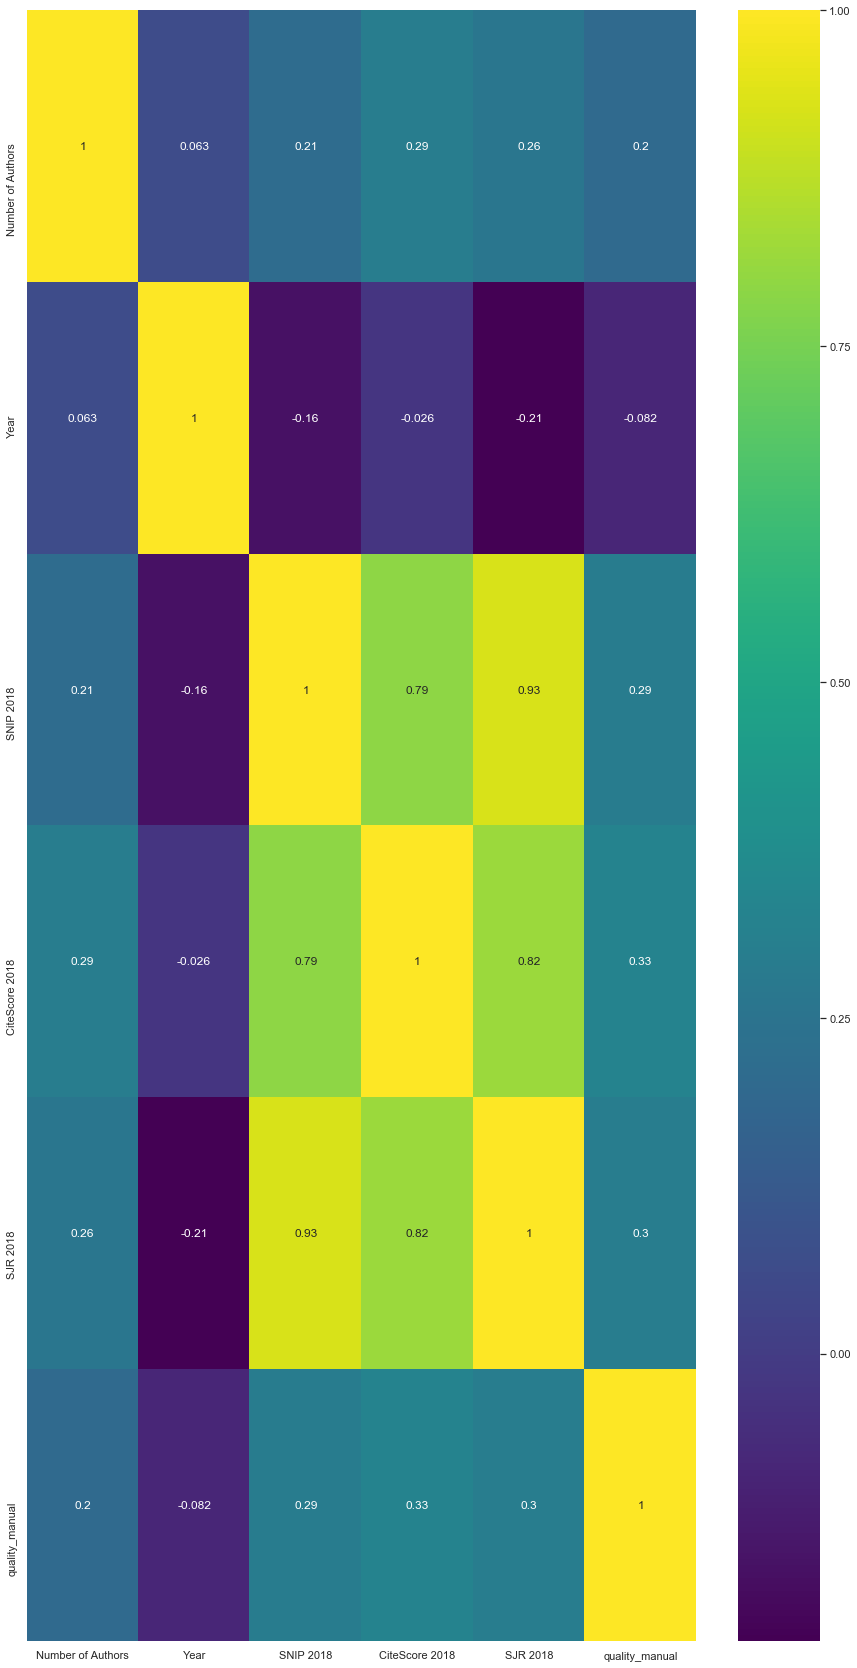

In [502]:
#heatmap
plt.figure(figsize=(15, 30))
sns.heatmap(data,
            cmap="viridis", annot=True, cbar=True, xticklabels = True, yticklabels = True)

In [239]:
stats.spearmanr(df_useful['Topic Cluster name'], df_useful['quality_manual'])

C:\Users\Yulqui\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



SpearmanrResult(correlation=-0.09903382124419186, pvalue=3.0366222846253682e-27)

Похоже, существует значимая корреляция между кластерами и качеством публикаций

In [240]:
stats.spearmanr(df_useful['Topic Cluster name'], df_useful['Field-Weighted Citation Impact'])

SpearmanrResult(correlation=-0.12309284493663941, pvalue=2.832065207407915e-41)

# логистическая регрессия

In [125]:
median_quality = np.median(df_useful['Field-Weighted Citation Impact'])
print('Медиана по качеству публикаций: ', median_quality)

Медиана по качеству публикаций:  0.34


In [223]:
mean_quality = np.mean(df_useful['Field-Weighted Citation Impact'])
print('Средняя оценка по качеству публикаций: ', mean_quality)

Средняя оценка по качеству публикаций:  1.472597369752161


Возьмем порог равный средней оценке качества публикации (можно было бы взять медиану, но давайте будем построже): будем считать, что публикации с FWCI >= mean_quality - это качетвенные публикации, а остальные - нет. Создадим биноминальную переменную

In [224]:
def quality_encoding(citation_value):
    if citation_value >= mean_quality:
        return 1
    else:
        return 0

In [222]:
df_useful['quality_manual'] = df_useful['Field-Weighted Citation Impact'].apply(lambda row: quality_encoding(row))
df_useful

,Title,Number of Authors,Year,Scopus Source title,Source-type,SNIP 2018,CiteScore 2018,SJR 2018,Field-Weighted View Impact,Views,...,All Science Journal Classification (ASJC) Code,All Science Journal Classification (ASJC) Field Name,Topic Cluster name,Topic Cluster number,Topic name,Topic number,Cluster_type,PubQual,ClusterManual,quality_manual
0,Combined Measurement of the Higgs Boson Mass i...,5154,2015,Physical Review Letters,Journal,2.548,5.76,4.656,63.03,1277,...,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Standard model (particle physics),Mass,Gaugino...",452,K,U,K,1
1,The Casimir force between real materials: Expe...,3,2009,Reviews of Modern Physics,Journal,18.820,NaN,36.880,5.66,130,...,3100,General Physics and Astronomy,"Gravitation,Black Holes (Astronomy),Models",15,"Force,Interactions,Proximity force",1282,K,W,K,1
2,Measurements of the Higgs boson production and...,5114,2016,Journal of High Energy Physics,Journal,1.334,3.97,1.163,142.87,1718,...,3106,Nuclear and High Energy Physics,"Decay,Quarks,Neutrinos",6,"Higgs bosons,Standard model (particle physics)...",10763,K,U,K,1
3,Enhanced production of direct photons in Au+Au...,421,2010,Physical Review Letters,Journal,2.805,NaN,6.450,4.02,112,...,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Collisions,Ionic collisions,Flow harmonics",633,K,U,K,1
4,Performance of the ALICE experiment at the CER...,944,2014,International Journal of Modern Physics A,Journal,0.539,1.16,0.838,8.04,178,...,3103; 3106; 3107,Astronomy and Astrophysics; Nuclear and High E...,"Decay,Quarks,Neutrinos",6,"Colliding beam accelerators,Heavy ions,Pp coll...",28474,K,U,K,1
5,Detailed measurement of the e+e- pair continuu...,422,2010,Physical Review C - Nuclear Physics,Journal,NaN,NaN,NaN,12.89,102,...,3106,Nuclear and High Energy Physics,"Decay,Quarks,Neutrinos",6,"Mesons,Collisions,QCD sum",5312,K,U,K,1
6,Event generator tunes obtained from underlying...,2304,2016,European Physical Journal C,Journal,1.823,2.30,1.653,11.79,183,...,3101; 2201,Physics and Astronomy (miscellaneous); Enginee...,"Decay,Quarks,Neutrinos",6,"Collisions,Jets,Proton–proton collisions",1026,K,U,K,1
7,Cooling neutron star in the Cassiopeia A super...,5,2011,Monthly Notices of the Royal Astronomical Soci...,Journal,NaN,3.91,NaN,2.92,42,...,1912; 3103,Space and Planetary Science; Astronomy and Ast...,"Nuclei,Neutrons,Reaction",83,"Matter (physics),Neutron stars,Constrained var...",7668,E,D,K,1
8,Measurements of higher order flow harmonics in...,384,2011,Physical Review Letters,Journal,2.911,7.02,6.314,5.60,131,...,3100,General Physics and Astronomy,"Decay,Quarks,Neutrinos",6,"Collisions,Ionic collisions,Flow harmonics",633,K,U,K,1
9,Observation of the rare B0s→μ+μ- decay from th...,2829,2015,Nature,Journal,8.000,14.38,19.669,50.84,1251,...,1000,Multidisciplinary,"Decay,Quarks,Neutrinos",6,"Decay,Flavor (particle physics),Differential b...",2278,K,U,K,1


In [245]:
df_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11862 entries, 0 to 11861
Data columns (total 24 columns):
Title                                                                 11862 non-null object
Number of Authors                                                     11862 non-null int64
Year                                                                  11862 non-null int64
Scopus Source title                                                   11862 non-null object
Source-type                                                           11862 non-null object
SNIP 2018                                                             8931 non-null float64
CiteScore 2018                                                        8273 non-null float64
SJR 2018                                                              8874 non-null float64
Field-Weighted View Impact                                            11862 non-null float64
Views                                                           

Дропаем ненужные или линейно зависящие друг от друга колонки (например, quality_manual и Field-Weighted Citation Impact линейно зависят друг от друга. т.к. для вычисления первого мы использовали второе)

In [290]:
regress_df = df_useful.drop(['PubQual', 'Cluster_type',  'Topic Cluster number', 'Topic number', 'Title', 'All Science Journal Classification (ASJC) Code', 'Outputs in Top Citation Percentiles, per percentile', 'Field-Weighted Citation Impact', 'Citations', 'Views'], axis=1)

In [291]:
regress_df.fillna(0, inplace=True)

In [292]:
regress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11862 entries, 0 to 11861
Data columns (total 14 columns):
Number of Authors                                                     11862 non-null int64
Year                                                                  11862 non-null int64
Scopus Source title                                                   11862 non-null object
Source-type                                                           11862 non-null object
SNIP 2018                                                             11862 non-null float64
CiteScore 2018                                                        11862 non-null float64
SJR 2018                                                              11862 non-null float64
Field-Weighted View Impact                                            11862 non-null float64
Field-Weighted Outputs in Top Citation Percentiles, per percentile    11862 non-null int64
All Science Journal Classification (ASJC) Field Name          

In [293]:
regress_df.head()

,Number of Authors,Year,Scopus Source title,Source-type,SNIP 2018,CiteScore 2018,SJR 2018,Field-Weighted View Impact,"Field-Weighted Outputs in Top Citation Percentiles, per percentile",All Science Journal Classification (ASJC) Field Name,Topic Cluster name,Topic name,ClusterManual,quality_manual
0,5154,2015,Physical Review Letters,Journal,2.548,5.76,4.656,63.03,1,General Physics and Astronomy,"Decay,Quarks,Neutrinos","Standard model (particle physics),Mass,Gaugino...",K,1
1,3,2009,Reviews of Modern Physics,Journal,18.820,0.00,36.880,5.66,1,General Physics and Astronomy,"Gravitation,Black Holes (Astronomy),Models","Force,Interactions,Proximity force",K,1
2,5114,2016,Journal of High Energy Physics,Journal,1.334,3.97,1.163,142.87,1,Nuclear and High Energy Physics,"Decay,Quarks,Neutrinos","Higgs bosons,Standard model (particle physics)...",K,1
3,421,2010,Physical Review Letters,Journal,2.805,0.00,6.450,4.02,1,General Physics and Astronomy,"Decay,Quarks,Neutrinos","Collisions,Ionic collisions,Flow harmonics",K,1
4,944,2014,International Journal of Modern Physics A,Journal,0.539,1.16,0.838,8.04,2,Astronomy and Astrophysics; Nuclear and High E...,"Decay,Quarks,Neutrinos","Colliding beam accelerators,Heavy ions,Pp coll...",K,1


In [294]:
#drop all data with K cluster
regress_df = regress_df[regress_df['ClusterManual']!='K']



In [295]:
regress_df.drop('ClusterManual', inplace=True, axis=1)

In [505]:
regress_df.head()

,Number of Authors,Year,Scopus Source title,Source-type,SNIP 2018,CiteScore 2018,SJR 2018,Field-Weighted View Impact,All Science Journal Classification (ASJC) Field Name,Topic Cluster name,Topic name,quality_manual
15,7,2015,Nature,Journal,8.000,14.38,19.669,4.04,Multidisciplinary,"Electron Microscopy,Aberrations,Electron Micro...","Cryoelectron Microscopy,Maps as Topic,Near-ato...",1
113,3,2012,Nucleic Acids Research,Journal,2.416,8.62,6.329,1.77,Genetics,"Quantitative Structure-Activity Relationship,D...","Ligands,Docking,Structure-based virtual",1
183,23,2018,Nature,Journal,9.199,15.21,16.345,10.63,Multidisciplinary,"Genome,Neoplasms,Genes","Cells,Sequence Analysis, RNA,Single-cell trans...",1
211,6,2011,Journal of Physical Chemistry C,Journal,1.472,4.92,2.339,2.24,"Physical and Theoretical Chemistry; Surfaces, ...","Proton Exchange Membrane Fuel Cells (PEMFC),El...","Electrolytic reduction,Electrocatalysts,Rotati...",1
231,4,2012,PLoS ONE,Journal,1.170,4.15,1.982,2.86,General Agricultural and Biological Sciences; ...,"Serum Albumin,Albumins,Fluorescence","Serum Albumin,Serum Albumin, Bovine,Static que...",1


In [513]:
regress_df.drop(['Field-Weighted Outputs in Top Citation Percentiles, per percentile','Topic name'], inplace=True, axis=1)

KeyError: "['Field-Weighted Outputs in Top Citation Percentiles, per percentile'] not found in axis"

In [514]:
regress_df.drop(['Topic name'], inplace=True, axis=1)

In [543]:
#create dummy variables
cat_vars=['Scopus Source title','Source-type',
          'All Science Journal Classification (ASJC) Field Name','Topic Cluster name',]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(regress_df[var], prefix=var)
    data1=regress_df.join(cat_list)
    data=data1
cat_vars=['Scopus Source title','Source-type',
          'All Science Journal Classification (ASJC) Field Name','Topic Cluster name','Topic name',]
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [544]:
data_final=data[to_keep]
data_final.columns.values

array(['Number of Authors', 'Year', 'SNIP 2018', 'CiteScore 2018',
       'SJR 2018', 'Field-Weighted View Impact', 'quality_manual',
       'Topic Cluster name_-',
       'Topic Cluster name_Acids,Triterpenes,Oleanolic Acid',
       'Topic Cluster name_Acoustic Surface Wave Devices,Resonators,Acoustic Waves',
       'Topic Cluster name_Acoustics,Architectural Acoustics,Acoustic Waves',
       'Topic Cluster name_Acrylamide,Occupational Exposure,Benzene',
       'Topic Cluster name_Acute Myeloid Leukemia,Patients,Precursor Cell Lymphoblastic Leukemia-Lymphoma',
       'Topic Cluster name_Adaptive Optics,Telescopes,Wavefronts',
       'Topic Cluster name_Adolescent,Pediatrics,Schools',
       'Topic Cluster name_Adsorption,Activated Carbon,Adsorbents',
       'Topic Cluster name_Africa,African,South Africa',
       'Topic Cluster name_Agents,Game Theory,Models',
       'Topic Cluster name_Agriculture,Fruits,Agricultural Machinery',
       'Topic Cluster name_Airports,Air Transportation,

In [545]:
data_final.drop(['Topic Cluster name_-'], axis=1, inplace=True)

C:\Users\Yulqui\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [546]:
data_final.rename(columns={'quality_manual':'y'}, inplace=True)

C:\Users\Yulqui\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [547]:
data_final.columns.values

array(['Number of Authors', 'Year', 'SNIP 2018', 'CiteScore 2018',
       'SJR 2018', 'Field-Weighted View Impact', 'y',
       'Topic Cluster name_Acids,Triterpenes,Oleanolic Acid',
       'Topic Cluster name_Acoustic Surface Wave Devices,Resonators,Acoustic Waves',
       'Topic Cluster name_Acoustics,Architectural Acoustics,Acoustic Waves',
       'Topic Cluster name_Acrylamide,Occupational Exposure,Benzene',
       'Topic Cluster name_Acute Myeloid Leukemia,Patients,Precursor Cell Lymphoblastic Leukemia-Lymphoma',
       'Topic Cluster name_Adaptive Optics,Telescopes,Wavefronts',
       'Topic Cluster name_Adolescent,Pediatrics,Schools',
       'Topic Cluster name_Adsorption,Activated Carbon,Adsorbents',
       'Topic Cluster name_Africa,African,South Africa',
       'Topic Cluster name_Agents,Game Theory,Models',
       'Topic Cluster name_Agriculture,Fruits,Agricultural Machinery',
       'Topic Cluster name_Airports,Air Transportation,Aircraft',
       'Topic Cluster name_Alcoho

In [548]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y'].values.ravel()
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  1126
Number of no subscription in oversampled data 563
Number of subscription 563
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [549]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

[False False False False  True False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Yulqui\Anaconda3\lib\site-packa

In [304]:
print(rfe.ranking_)

[640 634 164  59 275 519 398  65 402   1 659 434 257 492 588 234 110 622
 137 226 678 195 686 366 300 691  39 525  21 108 601 661 648 400 120 447
 690 104 552 439 136 214 436 156 211 512 163 664 568 389 740 741 534 520
 228 742 458 753 755 189  35 418 669 759 666 763 730   9 529 607 227  54
 654  36 101  95 699 190 122 688   1 405 322 537 576 620  38 783 811 307
 787 141 826 344 823 283 498 629 347 652 675 722 468 476 845 356 839 182
 207 229 278 455 773 277  74  33 314  72 478   5  78  57 818 210 531 751
 804 357 808 587 130 784 819 311 157 201 667 280 138 166 842 504 420 604
 852 169 639 714 171 508 523 219 271  64 854 637  52 566 693 393 192 662
 191   2 135 449   1 331 697 208  19 295 443 709 707 683 685 687 681 789
 377 717  93 718   1 702 117 323 550 435 368 272 610  51 426 427 766 312
 387 380 315 220 554 509  40 167 644 779 540 782 332 353 430 408 593 134
 545 247 507 273  47 748 213 833 837  97 838 127 362 372 223 859 858 305
 109   1 369 770 873 875 500 495 769 112 786 785 27

In [283]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [593]:

#while n<20:
#    for i in rfe.ranking_:
#        print(data_final.columns.values[i])
#        cols.append(data_final.columns.values[i])
#    n+=1

cols = list(data_final.columns.values)
cols

['Number of Authors',
 'Year',
 'SNIP 2018',
 'CiteScore 2018',
 'SJR 2018',
 'Field-Weighted View Impact',
 'y',
 'Topic Cluster name_Acids,Triterpenes,Oleanolic Acid',
 'Topic Cluster name_Acoustic Surface Wave Devices,Resonators,Acoustic Waves',
 'Topic Cluster name_Acoustics,Architectural Acoustics,Acoustic Waves',
 'Topic Cluster name_Acrylamide,Occupational Exposure,Benzene',
 'Topic Cluster name_Acute Myeloid Leukemia,Patients,Precursor Cell Lymphoblastic Leukemia-Lymphoma',
 'Topic Cluster name_Adaptive Optics,Telescopes,Wavefronts',
 'Topic Cluster name_Adolescent,Pediatrics,Schools',
 'Topic Cluster name_Adsorption,Activated Carbon,Adsorbents',
 'Topic Cluster name_Africa,African,South Africa',
 'Topic Cluster name_Agents,Game Theory,Models',
 'Topic Cluster name_Agriculture,Fruits,Agricultural Machinery',
 'Topic Cluster name_Airports,Air Transportation,Aircraft',
 'Topic Cluster name_Alcohols,Reward,Cocaine',
 'Topic Cluster name_Algebra,Category,Module',
 'Topic Cluster na

In [594]:
cols.remove('y')

In [595]:
from itertools import compress
cols = list(compress(cols, rfe.support_))

In [596]:
print(cols)
#отобрали наиболее влиятельные переменные

['SJR 2018', 'Topic Cluster name_Alcohols,Reward,Cocaine', 'Topic Cluster name_Applications,Models,Ubiquitous Computing', 'Topic Cluster name_Breads,Starch,Glutens', 'Topic Cluster name_Cheeses,Caseins,Milk', 'Topic Cluster name_Direction Of Arrival,Estimation,Beamforming', 'Topic Cluster name_France,Education,Work', 'Topic Cluster name_G-Protein-Coupled Receptors,Arrestins,Ligands', 'Topic Cluster name_Land Use,Models,Rural Areas', 'Topic Cluster name_Lizards,Turtles,Frogs', 'Topic Cluster name_Offense,Police,Offender', 'Topic Cluster name_Oil Spills,Hazardous Materials Spills,Marine Pollution', 'Topic Cluster name_Planning,Governance,Community', 'Topic Cluster name_Polyaniline,Polypyrroles,Conducting Polymers', 'Topic Cluster name_Polyvinyl Chlorides,Plasticizers,Polypropylenes', 'Topic Cluster name_Public Relations,Social Media,Industry', 'Topic Cluster name_Raman Spectroscopy,Fluid Inclusion,Sapphire', 'Topic Cluster name_Rubber,Elastomers,Butadiene', 'Topic Cluster name_Students,T

In [597]:
cols.remove('Topic Cluster name_Applications,Models,Ubiquitous Computing')

In [598]:
X=os_data_X[cols]
y=os_data_y['y']

In [599]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(groups='subject')
print(result.summary2())
logit_model.loglikeobs(result.params) 

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [387]:
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



ValueError: could not convert string to float: 'Number of Authors'

In [560]:
model = LogisticRegression(C=1e9)
mdl = model.fit(X, y)
model.coef_

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



array([[  1.61828988,  41.52918376,  38.24198206,   2.58084443,
         59.01006402, -14.6154985 ,  16.96860237, -14.11337041,
         15.26468386, 347.85040216,  43.68687438,  33.13394847,
         63.73691195, 248.67087474, -13.99170454, 362.40266219,
         56.89083182,  42.43699229,   3.27528305,  -2.74232407]])

In [659]:
b = [1.61828988,  41.52918376,  38.24198206,   2.58084443,
         59.01006402, -14.6154985 ,  16.96860237, -14.11337041,
         15.26468386, 347.85040216,  43.68687438,  33.13394847,
         63.73691195, 248.67087474, -13.99170454, 362.40266219,
         56.89083182,  42.43699229,   3.27528305,  -2.74232407]

In [660]:
tpcclstr = ['SJR 2018', 'Topic Cluster name_Alcohols,Reward,Cocaine', 'Topic Cluster name_Applications,Models,Ubiquitous Computing', 'Topic Cluster name_Breads,Starch,Glutens', 'Topic Cluster name_Cheeses,Caseins,Milk', 'Topic Cluster name_Direction Of Arrival,Estimation,Beamforming', 'Topic Cluster name_France,Education,Work', 'Topic Cluster name_G-Protein-Coupled Receptors,Arrestins,Ligands', 'Topic Cluster name_Land Use,Models,Rural Areas', 'Topic Cluster name_Lizards,Turtles,Frogs', 'Topic Cluster name_Offense,Police,Offender', 'Topic Cluster name_Oil Spills,Hazardous Materials Spills,Marine Pollution', 'Topic Cluster name_Planning,Governance,Community', 'Topic Cluster name_Polyaniline,Polypyrroles,Conducting Polymers', 'Topic Cluster name_Polyvinyl Chlorides,Plasticizers,Polypropylenes', 'Topic Cluster name_Public Relations,Social Media,Industry', 'Topic Cluster name_Raman Spectroscopy,Fluid Inclusion,Sapphire', 'Topic Cluster name_Rubber,Elastomers,Butadiene', 'Topic Cluster name_Students,Teaching,Engineering Education; Laboratories', 'Topic Cluster name_Tooth,Bone And Bones,Dentin']

In [661]:
print(len(b), len(tpcclstr))

20 20


In [662]:
top_features_lg = pd.DataFrame(list(zip(tpcclstr, b)), 
               columns =['Topic_cluster', 'Coefficient']) 

In [663]:
top_features_lg

,Topic_cluster,Coefficient
0,SJR 2018,1.618290
1,"Topic Cluster name_Alcohols,Reward,Cocaine",41.529184
2,"Topic Cluster name_Applications,Models,Ubiquit...",38.241982
3,"Topic Cluster name_Breads,Starch,Glutens",2.580844
4,"Topic Cluster name_Cheeses,Caseins,Milk",59.010064
5,"Topic Cluster name_Direction Of Arrival,Estima...",-14.615498
6,"Topic Cluster name_France,Education,Work",16.968602
7,Topic Cluster name_G-Protein-Coupled Receptors...,-14.113370
8,"Topic Cluster name_Land Use,Models,Rural Areas",15.264684
9,"Topic Cluster name_Lizards,Turtles,Frogs",347.850402


In [561]:
logit = sm.Logit(y, X)
logit.fit().params

         Current function value: inf
         Iterations: 35


C:\Users\Yulqui\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning:

divide by zero encountered in log



LinAlgError: Singular matrix

In [562]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Yulqui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [563]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [564]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[146  16]
 [ 86  90]]


In [332]:
#146 correct predictions and 86 incorrect predictions

In [565]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.90      0.74       162
           1       0.85      0.51      0.64       176

    accuracy                           0.70       338
   macro avg       0.74      0.71      0.69       338
weighted avg       0.74      0.70      0.69       338



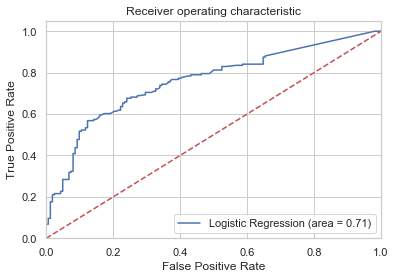

In [566]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## random forest

In [622]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True, max_features = 'sqrt')
tree = model.fit(X_train, y_train)

In [623]:
tree

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [578]:
# Make probability predictions
train_probs = model.predict_proba(X_train)[:, 1]
probs = model.predict_proba(X_test)[:, 1]

train_predictions = model.predict(X_train)
predictions = model.predict(X_test)

In [579]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.9352813057794789
Test ROC AUC  Score: 0.7311833613916946


На тестовом датасете лес показал себя немного лучше (70% по сравнению с 73% точности)

In [600]:
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

In [601]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [602]:
print(roc_value)

0.7311833613916946


In [603]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


In [604]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [605]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({0.3420716603804388: 74, 1.0: 39, 0.0: 19, 0.97: 10, 0.01: 8, 0.15484523809523806: 6, 0.27716666666666656: 5, 0.94: 5, 0.36: 5, 0.24: 5, 0.09: 5, 0.2449134133410449: 4, 0.37: 4, 0.92: 4, 0.89: 3, 0.68: 3, 0.96: 3, 0.04: 3, 0.012333333333333333: 3, 0.71: 3, 0.05: 3, 0.95: 3, 0.91: 3, 0.3: 3, 0.98: 3, 0.40149999999999997: 2, 0.7869591535202558: 2, 0.99: 2, 0.4372325109530992: 2, 0.125: 2, 0.19906024531024524: 2, 0.11816666666666667: 2, 0.84: 2, 0.46822619047619063: 2, 0.09742828288842219: 2, 0.02: 2, 0.45751645576645567: 2, 0.6433333333333334: 2, 0.75: 2, 0.5471666666666668: 2, 0.9527777777777778: 2, 0.25: 1, 0.41: 1, 0.20524668369646476: 1, 0.15333333333333335: 1, 0.04101190476190476: 1, 0.6704814740418363: 1, 0.9394166666666668: 1, 0.38: 1, 0.5607145077145076: 1, 0.4: 1, 0.76: 1, 0.67: 1, 0.06: 1, 0.424: 1, 0.32716666666666655: 1, 0.77: 1, 0.01765873015873016: 1, 0.7567822647713119: 1, 0.40521428571428575: 1, 0.008333333333333333: 1, 0.7427817460317462: 1, 0.63: 1, 0.8356072193

Recall Baseline: 1.0 Test: 0.58 Train: 0.75
Precision Baseline: 0.52 Test: 0.78 Train: 0.97
Roc Baseline: 0.5 Test: 0.73 Train: 0.94


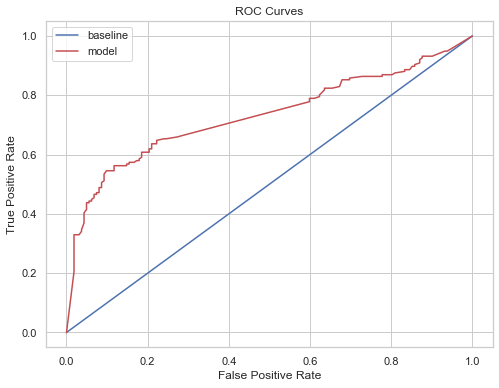

In [607]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
evaluate_model(predictions, probs, train_predictions, train_probs)

Признаки оверфиттинга на трейнинг датасете

### confusion matrix

In [608]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


Confusion matrix, without normalization
[[134  28]
 [ 74 102]]


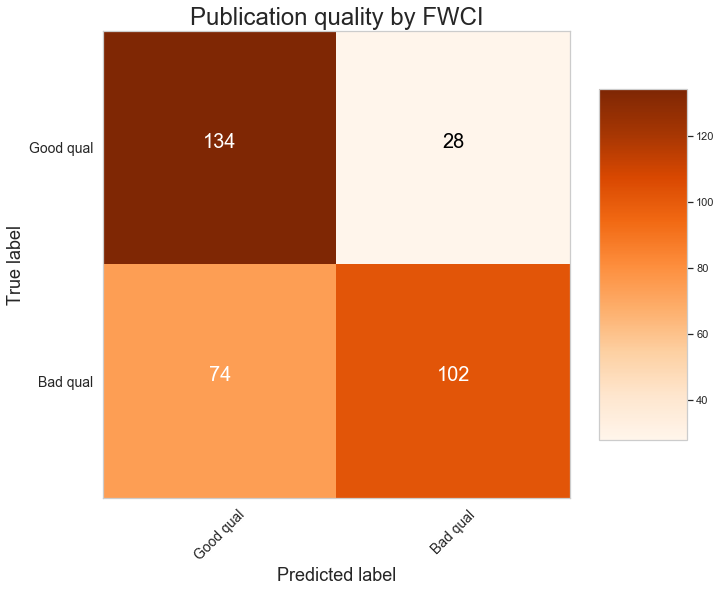

In [610]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['Good qual', 'Bad qual'],
                      title = 'Publication quality by FWCI')

### Feature Importance

Based on the reduction in Gini Impurity over all of the nodes of the tree in which the feature is used.

In [612]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
0,SJR 2018,0.800315
18,"Topic Cluster name_Students,Teaching,Engineeri...",0.023355
16,"Topic Cluster name_Raman Spectroscopy,Fluid In...",0.022005
4,"Topic Cluster name_Cheeses,Caseins,Milk",0.016247
3,"Topic Cluster name_Breads,Starch,Glutens",0.013463


In [619]:
from sklearn.tree import export_graphviz
features = list(X_train.columns)

In [624]:
export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
                feature_names = features, max_depth = 6,
                class_names = ['Bad qual','Good qual'], filled = True)

# Convert to png
call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

# Visualize
Image(filename='tree_real_data.png')

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [625]:
from sklearn.ensemble import RandomForestClassifier
RSEED = 50
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [626]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 286
Average maximum depth 34


In [627]:
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.57 Train: 0.74
Precision Baseline: 0.52 Test: 0.78 Train: 0.98
Roc Baseline: 0.5 Test: 0.74 Train: 0.93


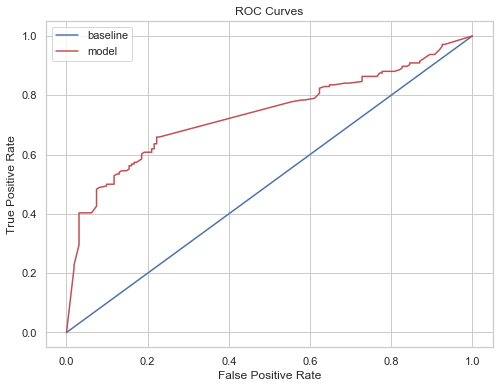

In [628]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[134  28]
 [ 75 101]]


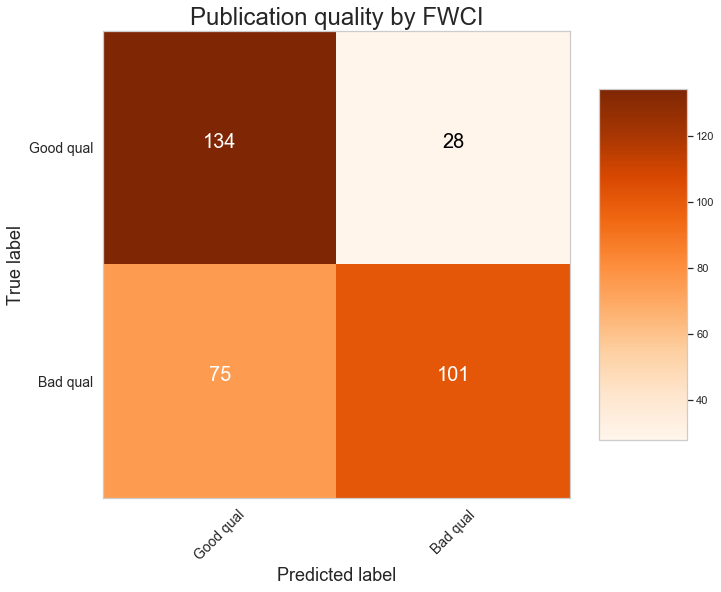

In [630]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Good qual', 'Bad qual'],
                      title = 'Publication quality by FWCI')

In [631]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
0,SJR 2018,0.806100
18,"Topic Cluster name_Students,Teaching,Engineeri...",0.023234
16,"Topic Cluster name_Raman Spectroscopy,Fluid In...",0.021351
4,"Topic Cluster name_Cheeses,Caseins,Milk",0.015971
3,"Topic Cluster name_Breads,Starch,Glutens",0.013233
6,"Topic Cluster name_France,Education,Work",0.012325
15,"Topic Cluster name_Public Relations,Social Med...",0.011990
10,"Topic Cluster name_Offense,Police,Offender",0.011252
17,"Topic Cluster name_Rubber,Elastomers,Butadiene",0.010912
11,"Topic Cluster name_Oil Spills,Hazardous Materi...",0.010561


### optimization

In [632]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [633]:

rs.best_params_

{'n_estimators': 29,
 'min_samples_split': 5,
 'max_leaf_nodes': 43,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

In [634]:

best_model = rs.best_estimator_

In [635]:

train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [636]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 68
Average maximum depth 16


Recall Baseline: 1.0 Test: 0.57 Train: 0.55
Precision Baseline: 0.52 Test: 0.89 Train: 0.91
Roc Baseline: 0.5 Test: 0.78 Train: 0.83


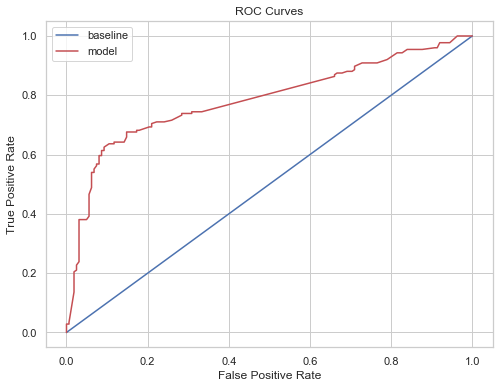

In [637]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [639]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=X_train.columns, max_depth = 8, 
                class_names = ['Good Q', 'Bad Q'], filled = True)

In [640]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

NameError: name 'call' is not defined

In [642]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': best_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
top_features_rf = fi_model.head(10)
top_features_rf

,feature,importance
0,SJR 2018,0.588926
18,"Topic Cluster name_Students,Teaching,Engineeri...",0.054376
16,"Topic Cluster name_Raman Spectroscopy,Fluid In...",0.048675
4,"Topic Cluster name_Cheeses,Caseins,Milk",0.032651
6,"Topic Cluster name_France,Education,Work",0.026566
3,"Topic Cluster name_Breads,Starch,Glutens",0.026450
10,"Topic Cluster name_Offense,Police,Offender",0.024419
17,"Topic Cluster name_Rubber,Elastomers,Butadiene",0.024166
15,"Topic Cluster name_Public Relations,Social Med...",0.023309
11,"Topic Cluster name_Oil Spills,Hazardous Materi...",0.021675


In [671]:
top_features_rf['feature'].tolist()

['SJR 2018',
 'Topic Cluster name_Students,Teaching,Engineering Education; Laboratories',
 'Topic Cluster name_Raman Spectroscopy,Fluid Inclusion,Sapphire',
 'Topic Cluster name_Cheeses,Caseins,Milk',
 'Topic Cluster name_France,Education,Work',
 'Topic Cluster name_Breads,Starch,Glutens',
 'Topic Cluster name_Offense,Police,Offender',
 'Topic Cluster name_Rubber,Elastomers,Butadiene',
 'Topic Cluster name_Public Relations,Social Media,Industry',
 'Topic Cluster name_Oil Spills,Hazardous Materials Spills,Marine Pollution']

In [655]:
fig = px.bar(top_features_rf,  y='importance',x='feature', labels={'feature':''})
fig.show()

# Дальнейшее исследование

Идеи для дальнейшего анализа: намайнить больше данных из scopus, web of science и пр. про университеты из топ-500, например. Кластеризировать университеты посмотреть какие кластеры выделяются. Провести анализ с помощью решающего леса и/или бустинга (xgBoost, CatBoost) для университетов их собственного кластера и из целевых кластеров (one hot encoding для кластеров, журналов и тем - обязательно)